# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
output_data_file1 = "output_data/cities1.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/"

print(f'Beginning Data Retrieval \n -----------------------------') 

lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
cities_list = []
country = []

x = 0
setcounter = 1
for city in cities:
    x += 1
    if (x == 50):
            setcounter = setcounter + 1
            x = 0 
    try:
        city_response = requests.get(f"{url}data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}")
        city_response_json = city_response.json()
        print(f'Processing Record {x} of Set {setcounter} | {city}')
        lat.append(city_response_json['coord']['lat'])
        lon.append(city_response_json['coord']['lon'])
        max_temp.append(city_response_json['main']['temp_max'])
        humidity.append(city_response_json['main']['humidity'])
        cloudiness.append(city_response_json['clouds']['all'])
        wind_speed.append(city_response_json['wind']['speed'])
        date.append(city_response_json['dt'])
        cities_list.append(city_response_json['name'])
        country.append(city_response_json['sys']['country'])
    except:
        print(f'City not found. Skipping...')

Beginning Data Retrieval 
 -----------------------------
Processing Record 1 of Set 1 | lakes entrance
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | moundsville
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | zaysan
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | flin flon
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | ossora
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | saleaula
City not found. Skipping...
Processing Record 22 of S

Processing Record 40 of Set 4 | bielsk podlaski
Processing Record 41 of Set 4 | igrim
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | sao miguel do tapuio
Processing Record 44 of Set 4 | egvekinot
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | jian
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | vrangel
Processing Record 49 of Set 4 | lesozavodsk
Processing Record 0 of Set 5 | san andres
Processing Record 1 of Set 5 | saryozek
Processing Record 2 of Set 5 | urucui
Processing Record 3 of Set 5 | greenwood
Processing Record 4 of Set 5 | koulikoro
Processing Record 5 of Set 5 | karratha
Processing Record 6 of Set 5 | la paz
Processing Record 7 of Set 5 | vidalia
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | pisco
Processing Record 10 of Set 5 | sao francisco
Processing Record 11 of Set 5 | oswego
Processing Record 12 of Set 

Processing Record 28 of Set 8 | aksarka
Processing Record 29 of Set 8 | porirua
Processing Record 30 of Set 8 | parkersburg
Processing Record 31 of Set 8 | batticaloa
Processing Record 32 of Set 8 | baghdad
Processing Record 33 of Set 8 | yima
Processing Record 34 of Set 8 | ewa beach
Processing Record 35 of Set 8 | plettenberg bay
Processing Record 36 of Set 8 | puerto del rosario
Processing Record 37 of Set 8 | qandahar
City not found. Skipping...
Processing Record 38 of Set 8 | seymchan
Processing Record 39 of Set 8 | kyabram
Processing Record 40 of Set 8 | lolua
City not found. Skipping...
Processing Record 41 of Set 8 | bandarbeyla
Processing Record 42 of Set 8 | grindavik
Processing Record 43 of Set 8 | bereda
Processing Record 44 of Set 8 | ixtapa
Processing Record 45 of Set 8 | verkhnyaya toyma
Processing Record 46 of Set 8 | palmas bellas
Processing Record 47 of Set 8 | aswan
Processing Record 48 of Set 8 | leningradskiy
Processing Record 49 of Set 8 | kahta
Processing Record 

Processing Record 13 of Set 12 | casino
Processing Record 14 of Set 12 | aykhal
Processing Record 15 of Set 12 | bajil
Processing Record 16 of Set 12 | arkhara
Processing Record 17 of Set 12 | putina
Processing Record 18 of Set 12 | olga
Processing Record 19 of Set 12 | cerrito
Processing Record 20 of Set 12 | xining
Processing Record 21 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 22 of Set 12 | valtierrilla
Processing Record 23 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 24 of Set 12 | anchorage
Processing Record 25 of Set 12 | goedereede
Processing Record 26 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 27 of Set 12 | kulhudhuffushi
Processing Record 28 of Set 12 | san juan de los morros
Processing Record 29 of Set 12 | slyudyanka
Processing Record 30 of Set 12 | nuuk
Processing Record 31 of Set 12 | loreto
Processing Record 32 of Set 12 | usinsk
Processing Record 33 of Set 12 | dandong
Processing Record 34 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert to df
city_data = pd.DataFrame({'City': cities_list,
                        'Lat': lat,
                        'Lng': lon,
                        'Max_Temp': max_temp,
                        'Humidity': humidity,
                        'Cloudiness': cloudiness,
                        'Wind_Speed': wind_speed,
                        'Country': country,
                        'Date': date
})

#Export to .csv
city_data.to_csv("../output_data/cities1.csv", index=False)

#Display to df
city_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Lakes Entrance,-37.8811,147.9810,44.01,96,9,8.93,AU,1619469149
1,Lebu,-37.6167,-73.6500,59.00,73,2,12.57,CL,1619468889
2,Mataura,-46.1927,168.8643,39.99,89,100,1.01,NZ,1619468783
3,Punta Arenas,-53.1500,-70.9167,44.60,100,90,10.36,CL,1619468682
4,Moundsville,39.9203,-80.7431,66.99,31,1,3.04,US,1619469151


In [5]:
cities_df4 = city_data.describe(include='all')
cities_df4 = cities_df4.drop(['City', 'Country'], axis=1)
cities_df4.dropna()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,18.568266,15.462506,61.830912,67.760135,54.905405,7.402483,1.619469e+09
std,33.050963,91.512756,19.999854,23.575703,37.908267,4.863225,2.630185e+02
min,-54.800000,-179.166700,-0.920000,1.000000,0.000000,0.180000,1.619468e+09
25%,-8.784900,-67.451150,46.400000,55.000000,20.000000,3.642500,1.619469e+09
50%,20.783350,21.255800,66.000000,73.000000,66.500000,6.080000,1.619469e+09
75%,47.163175,97.287750,78.572500,87.000000,90.000000,10.052500,1.619469e+09
max,78.218600,178.416700,97.480000,100.000000,100.000000,29.930000,1.619469e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#The max value of humidity is 100 for my dataframe. So this step has been skipped.
city_data_df = city_data[city_data['Humidity'] > 100]
city_data_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.
#See section above

Int64Index([], dtype='int64')

In [9]:
city_data2 = city_data

quartiles = city_data2['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
outliers = city_data2.loc[(city_data2['Humidity'] < lower_bound) | (city_data2['Humidity'] > upper_bound)]
clean_city_data = city_data2.loc[(city_data2['Humidity'] >= lower_bound) & (city_data2['Humidity'] <= upper_bound)]
clean_city_data.tail()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
587,Ponta Delgada,37.7333,-25.6667,60.80,77,75,8.05,PT,1619469498
588,Omboué,-1.5746,9.2618,79.27,86,100,5.12,GA,1619469499
589,Ugoofaaru,5.6667,73.0000,82.96,74,5,5.12,MV,1619469499
590,North Platte,41.1239,-100.7654,86.00,19,1,9.22,US,1619469426
591,Belmonte,-15.8631,-38.8828,80.60,65,40,13.80,BR,1619469222


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

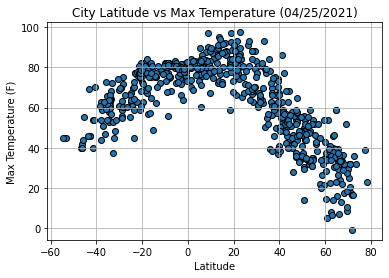

In [10]:
timestamp =  time.localtime(1619402630)
final_time = time.strftime("(%m/%d/%Y)", timestamp)
final_time

plt.scatter(clean_city_data['Lat'], clean_city_data['Max_Temp'], marker="o", edgecolors='Black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature {final_time}')
plt.grid(True)

plt.savefig("LatitudevsTemperature.png")
plt.show()

In [ ]:
'''
Observation: This scatter plot is analyzing the temperature around the world from -60 latitude to 
80 latitude and shows how temperature rises as the latitude gets closer to the equator (0 latitude)
'''

## Latitude vs. Humidity Plot

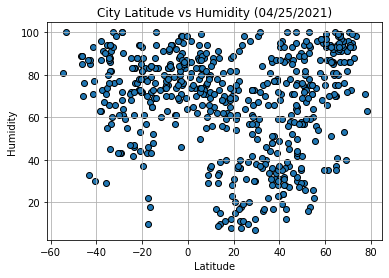

In [11]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o", edgecolors='Black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity {final_time}')
plt.grid(True)

plt.savefig("LatitudevsHumidity.png")
plt.show()

In [ ]:
'''
Observation: The average level of humididty looks to be higher around the equator. There seems to be no coorelation between a point of latitude and humidity
in other areas.
'''

## Latitude vs. Cloudiness Plot

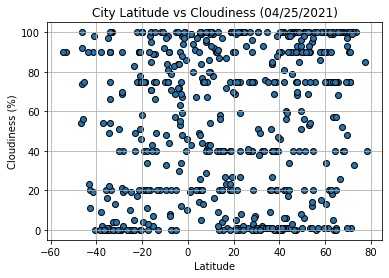

In [14]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o", edgecolors='Black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {final_time}')
plt.grid(True)

plt.savefig("LatitudevsCloudiness.png")
plt.show()

In [ ]:
'''
Observation: There seems to be little correlation between the point of latitude and cloudiness. 
On 4/24/21 though, there seemed to be more cloudy areas around the equator.
'''

## Latitude vs. Wind Speed Plot

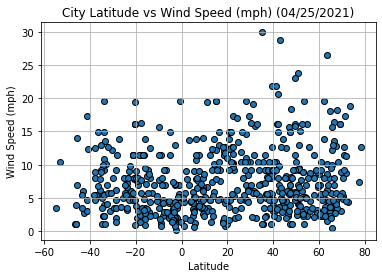

In [15]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind_Speed'], marker="o", edgecolors='Black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (mph) {final_time}')
plt.grid(True)

plt.savefig("LatitudevsWindSpeed.png")
plt.show()

In [ ]:
'''
Observation: From this plot, most areas from -60 latitude to 80 latitude have winds less than 10 mph.
'''

## Linear Regression

In [16]:
#Northern Hemishpere 

northern_hem = clean_city_data[clean_city_data["Lat"] >= 0]

#Southern Hemisphere 

southern_hem = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7598455861382919


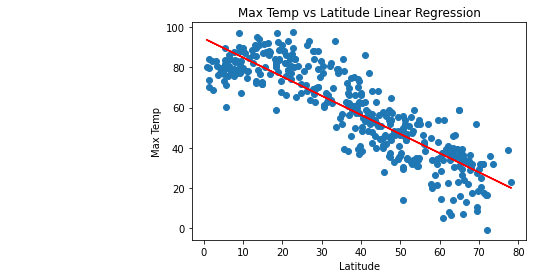

In [17]:
# Perform a linear regression on temperature vs. latitude
(slope1, intercept1, rvalue1, pvalue1, stderr1) = stats.linregress(northern_hem["Lat"], northern_hem['Max_Temp'])

# Get regression values
regress_values1 = northern_hem["Lat"] * slope1 + intercept1

# Create line equation string
line_eq1 = "y = " + str(round(slope1,2)) + "x +" + str(round(intercept1,2))

# Create Plot
plt.scatter(northern_hem["Lat"], northern_hem['Max_Temp'], marker="o")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Max Temp vs Latitude Linear Regression')
plt.plot(northern_hem["Lat"],regress_values1,"r-")
plt.annotate(line_eq1,(-50,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue1**2}")

# Show plot
plt.show()

In [ ]:
'''
Observation: The r-value of .774 indicates that there is a fairly positive correlation between the
latitude coordinates and equator. In other words, the further away the latitude point is from 0, the more
likely the max temp will be a lower value.
'''

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5686902099795071


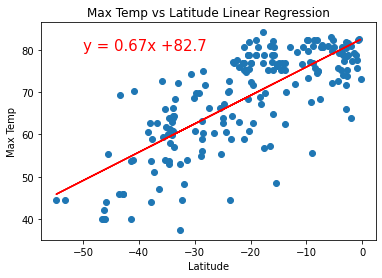

In [18]:
# Perform a linear regression on temperature vs. latitude
(slope1, intercept1, rvalue1, pvalue1, stderr1) = stats.linregress(southern_hem["Lat"], southern_hem['Max_Temp'])

# Get regression values
regress_values1 = southern_hem["Lat"] * slope1 + intercept1

# Create line equation string
line_eq1 = "y = " + str(round(slope1,2)) + "x +" + str(round(intercept1,2))

# Create Plot
plt.scatter(southern_hem["Lat"], southern_hem['Max_Temp'], marker="o")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Max Temp vs Latitude Linear Regression')
plt.plot(southern_hem["Lat"],regress_values1,"r-")
plt.annotate(line_eq1,(-50,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue1**2}")

# Show plot
plt.show()

In [ ]:
'''
Observation: The r-value of .484 indicates that there is a lower positive correlation between the
latitude coordinates and equator in the southern hemisphere than the northern hemisphere. In other 
words, as we keep going south from the equator max temp drops but not as consistently. 
'''

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05157940326609472


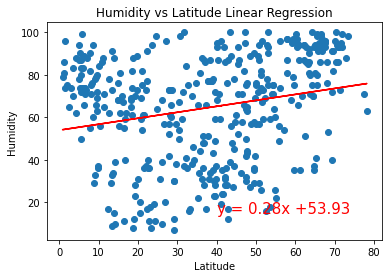

In [19]:
# Perform a linear regression on temperature vs. latitude
(slope2, intercept2, rvalue2, pvalue2, stderr2) = stats.linregress(northern_hem["Lat"], northern_hem['Humidity'])

# Get regression values
regress_values2 = northern_hem["Lat"] * slope2 + intercept2

# Create line equation string
line_eq2 = "y = " + str(round(slope2,2)) + "x +" + str(round(intercept2,2))

# Create Plot
plt.scatter(northern_hem["Lat"], northern_hem['Humidity'], marker="o")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Humidity vs Latitude Linear Regression')
plt.plot(northern_hem["Lat"],regress_values2,"r-")
plt.annotate(line_eq2,(40,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue2**2}")

# Show plot
plt.show()

In [ ]:
'''
Observation: Based on the low r-value, there is basically no correlation between the point of 
latitute and humidity level. The scatter plot also shows points with no consistency or pattern.

'''

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.002434327087114659


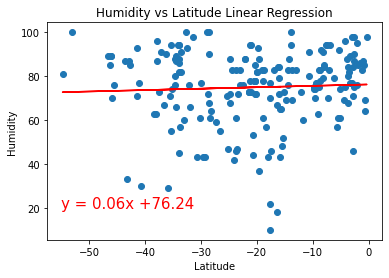

In [20]:
# Perform a linear regression on temperature vs. latitude
(slope1, intercept1, rvalue1, pvalue1, stderr1) = stats.linregress(southern_hem["Lat"], southern_hem['Humidity'])

# Get regression values
regress_values1 = southern_hem["Lat"] * slope1 + intercept1

# Create line equation string
line_eq1 = "y = " + str(round(slope1,2)) + "x +" + str(round(intercept1,2))

# Create Plot
plt.scatter(southern_hem["Lat"], southern_hem['Humidity'], marker="o")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Humidity vs Latitude Linear Regression')
plt.plot(southern_hem["Lat"],regress_values1,"r-")
plt.annotate(line_eq1,(-55,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue1**2}")

# Show plot
plt.show()

In [ ]:
'''
Observation: Based on the low r-value, there is basically no correlation between the point of 
latitute and humidity level in the southern hemsiphere. Though, the scatter plot shows alot of points 
with a high level of humidity between 0 and -20 degrees latitude. 
'''

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01756653194202431


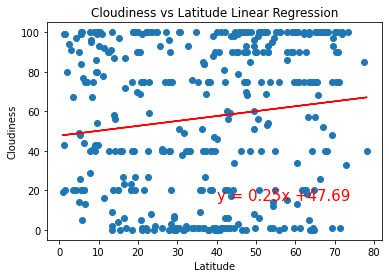

In [21]:
# Perform a linear regression on temperature vs. latitude
(slope2, intercept2, rvalue2, pvalue2, stderr2) = stats.linregress(northern_hem["Lat"], northern_hem['Cloudiness'])

# Get regression values
regress_values2 = northern_hem["Lat"] * slope2 + intercept2

# Create line equation string
line_eq2 = "y = " + str(round(slope2,2)) + "x +" + str(round(intercept2,2))

# Create Plot
plt.scatter(northern_hem["Lat"], northern_hem['Cloudiness'], marker="o")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Cloudiness vs Latitude Linear Regression')
plt.plot(northern_hem["Lat"],regress_values2,"r-")
plt.annotate(line_eq2,(40,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue2**2}")

# Show plot
plt.show()

In [ ]:
'''
Observation: The r-value shows very little coorelation between latitude 
and cloudiness in the northern hemisphere. The scatter plot shows the same with no consistency.
'''

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.041263710415336136


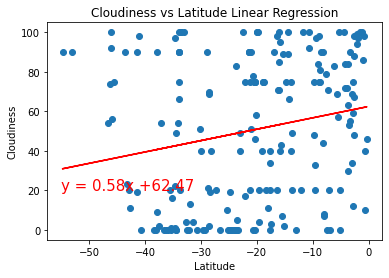

In [22]:
# Perform a linear regression on temperature vs. latitude
(slope1, intercept1, rvalue1, pvalue1, stderr1) = stats.linregress(southern_hem["Lat"], southern_hem['Cloudiness'])

# Get regression values
regress_values1 = southern_hem["Lat"] * slope1 + intercept1

# Create line equation string
line_eq1 = "y = " + str(round(slope1,2)) + "x +" + str(round(intercept1,2))

# Create Plot
plt.scatter(southern_hem["Lat"], southern_hem['Cloudiness'], marker="o")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Cloudiness vs Latitude Linear Regression')
plt.plot(southern_hem["Lat"],regress_values1,"r-")
plt.annotate(line_eq1,(-55,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue1**2}")

# Show plot
plt.show()

In [ ]:
'''
Observation: The r-value shows very little coorelation between latitude 
and cloudiness in the northern hemisphere. The scatter plot shows the same with no consistency. 
The correlation between the latitude and cloudiness are about the same in both hemispheres. 
'''

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0040193619490933525


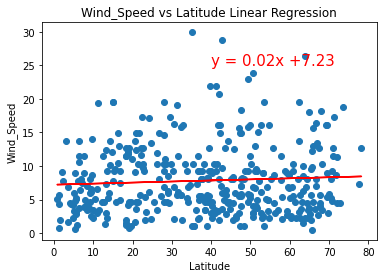

In [26]:
# Perform a linear regression on temperature vs. latitude
(slope2, intercept2, rvalue2, pvalue2, stderr2) = stats.linregress(northern_hem["Lat"], northern_hem['Wind_Speed'])

# Get regression values
regress_values2 = northern_hem["Lat"] * slope2 + intercept2

# Create line equation string
line_eq2 = "y = " + str(round(slope2,2)) + "x +" + str(round(intercept2,2))

# Create Plot
plt.scatter(northern_hem["Lat"], northern_hem['Wind_Speed'], marker="o")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
plt.title(f'Wind_Speed vs Latitude Linear Regression')
plt.plot(northern_hem["Lat"],regress_values2,"r-")
plt.annotate(line_eq2,(40,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue2**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.021497717616184932


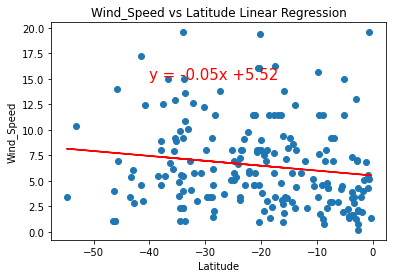

In [25]:
# Perform a linear regression on temperature vs. latitude
(slope7, intercept7, rvalue7, pvalue7, stderr7) = stats.linregress(southern_hem["Lat"], southern_hem['Wind_Speed'])

# Get regression values
regress_values7 = southern_hem["Lat"] * slope7 + intercept7

# Create line equation string
line_eq7 = "y = " + str(round(slope7,2)) + "x +" + str(round(intercept7,2))

# Create Plot
plt.scatter(southern_hem["Lat"], southern_hem['Wind_Speed'], marker="o")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
plt.title(f'Wind_Speed vs Latitude Linear Regression')
plt.plot(southern_hem["Lat"],regress_values7,"r-")
plt.annotate(line_eq7,(-40,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue7**2}")

# Show plot
plt.show()

In [27]:
'''
For Part I, you must include a written description of three observable trends based on the data:

Observation 1: Temperature seems to be the only one with any real coorelation to point of latitude. 

Observation 2: There was no negative correlation for any plots and tests taken

Observation 3: There is a slight difference between the Northern and Southern Hemishpere for some of these tests.
On the day the API was called, besides cloudiness, there was more coorelation between the test-subject and latitude.

'''

'\nFor Part I, you must include a written description of three observable trends based on the data:\n\nObservation 1: Temperature seems to be the only one with any real coorelation to point of latitude. \n\nObservation 2: There was no negative correlation for any plots and tests taken\n\nObservation 3: There is a slight difference between the Northern and Southern Hemishpere for some of these tests.\nOn the day the API was called, besides cloudiness, there was more coorelation between the test-subject and latitude.\n\n'